#MALL COUSTOMER SEGMENTATION
##Analysis | Project | INTERNSHIP
##Role : Software Development Intern
##Domain : DATA SCIENCE
##Organization : BharatVersity
##Team : Yelugu Kavya, Budati Nagaveni,  Lingareddy Rajasekhar reddy
##Duration : 7 weeks


## Problem Statement:
You own the mall and want to understand the customers like who can be easily Target Customers so that the sense can be given to marketing team and plan the strategy accordingly.<br>
### Here the problem is identifying the suitable customer for there mall so that , we want to know the details regarding the customer , so for identifying it we are using kmeams algorithm to make sure getting plan for marketing team

##Customer Segmentation Project:
This project enhances marketing strategies by identifying high-value customer segments for targeted promotions and personalized offers. It improves customer experience through tailored recommendations and optimizes resource allocation by aligning inventory with demand.  It helps both customer and seller.


#Performing simple EDA


In [1]:
#impoting data set with pandas
import numpy as np
import pandas as pd
mall = pd.read_csv("Mall_Customers.csv")

In [72]:
#knowing dimensions of data
mall.shape

(200, 7)

In [73]:
print('Mall Customer data table')
mall.head()

Mall Customer data table


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,0.000000,Male,0.019231,0.000000,0.387755,1,4
1,0.005025,Male,0.057692,0.000000,0.816327,1,2
2,0.010050,Female,0.038462,0.008197,0.051020,0,4
3,0.015075,Female,0.096154,0.008197,0.775510,0,2
4,0.020101,Female,0.250000,0.016393,0.397959,0,4


In [74]:
#index of table
print(mall.index)

RangeIndex(start=0, stop=200, step=1)


In [75]:

#data types included in table
mall.dtypes

,0
CustomerID,float64
Gender,object
Age,float64
Annual Income (k$),float64
Spending Score (1-100),float64
Gender_Male,int64
Cluster,int32


In [76]:
#knowing information of table completely
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    float64
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
 5   Gender_Male             200 non-null    int64  
 6   Cluster                 200 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 10.3+ KB


In [77]:
#statical presentation of data
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.50000,0.400962,0.373443,0.502041,0.440000,1.400000
std,0.29085,0.268635,0.215285,0.263505,0.497633,1.449311
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.25000,0.206731,0.217213,0.344388,0.000000,0.000000
50%,0.50000,0.346154,0.381148,0.500000,0.000000,1.000000
75%,0.75000,0.596154,0.516393,0.734694,1.000000,3.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,4.000000


###Converting columns into integers

In [78]:
mall['CustomerID'] = pd.to_numeric(mall['CustomerID'], errors='coerce')

In [79]:
mall['Age'] = pd.to_numeric(mall['Age'], errors='coerce')

In [80]:
mall['Annual Income (k$)'] = pd.to_numeric(mall['Annual Income (k$)'], errors='coerce')

In [81]:
mall['Spending Score (1-100)'] = pd.to_numeric(mall['Spending Score (1-100)'], errors='coerce')

In [82]:
#checking null values
mall.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
Gender_Male,0
Cluster,0




no data found null

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

<Axes: >

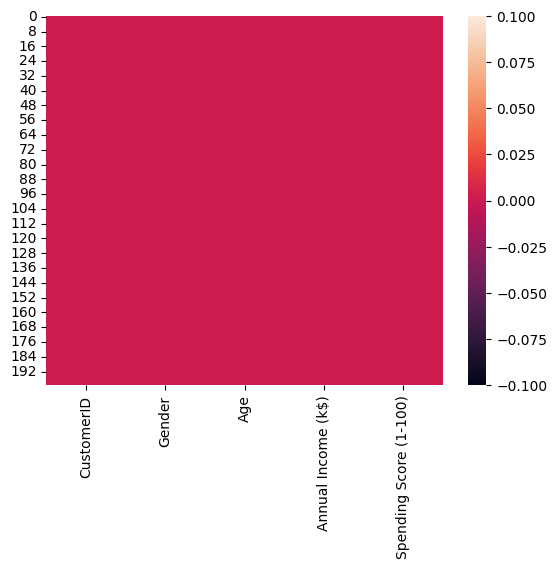

In [14]:
sns.heatmap(mall.isnull())

#Data visualization

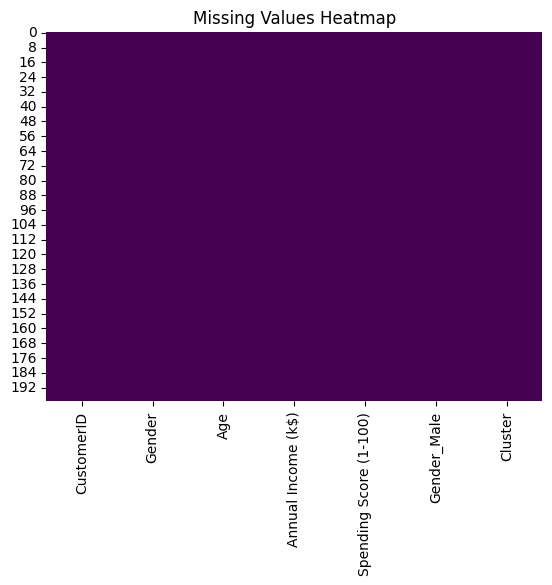

In [83]:
sns.heatmap(mall.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [84]:
# Handle missing values (example: fill with mean or drop)
#mall.fillna(mall.mean(), inplace=True)
#mall.dropna(inplace=True)

In [85]:
# Remove duplicates if any
mall.drop_duplicates(inplace=True)

In [86]:
# Feature scaling
# Select numerical features for scaling
numerical_features = mall.select_dtypes(include=[np.number]).columns.tolist()

In [87]:
#Standardization
scaler = StandardScaler()
mall[numerical_features] = scaler.fit_transform(mall[numerical_features])


In [88]:
# Normalization (if needed)
min_max_scaler = MinMaxScaler()
mall[numerical_features] = min_max_scaler.fit_transform(mall[numerical_features])  # Uncomment for normalization


/tmp/ipython-input-89-1779897996.py:2: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  plt.figure(1 , figsize = (10 , 5))


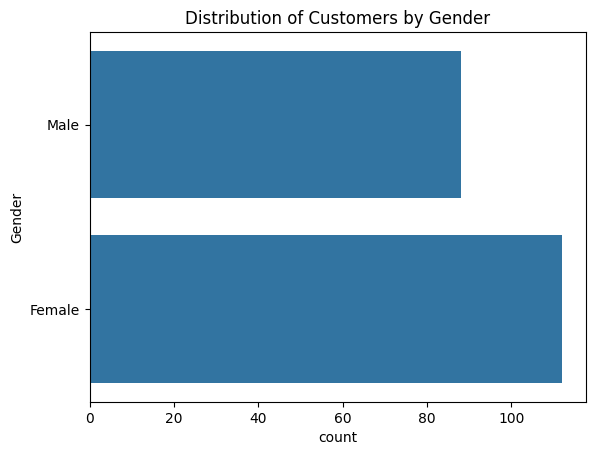

In [89]:
plt.title('Distribution of Customers by Gender')
plt.figure(1 , figsize = (10 , 5))
sns.countplot(y = 'Gender' , data = mall)
plt.show()

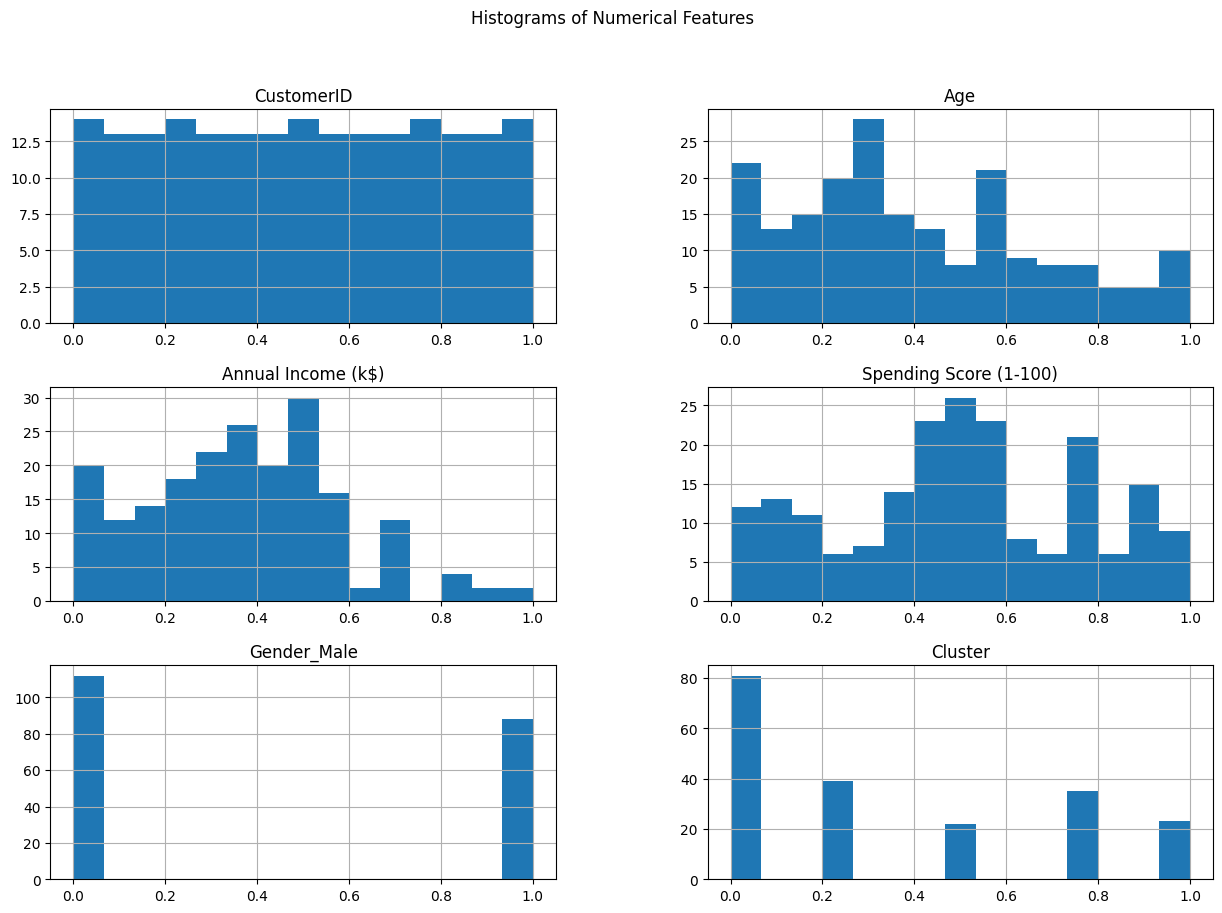

In [90]:
# Visualizations
# Histogram of numerical features
mall[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

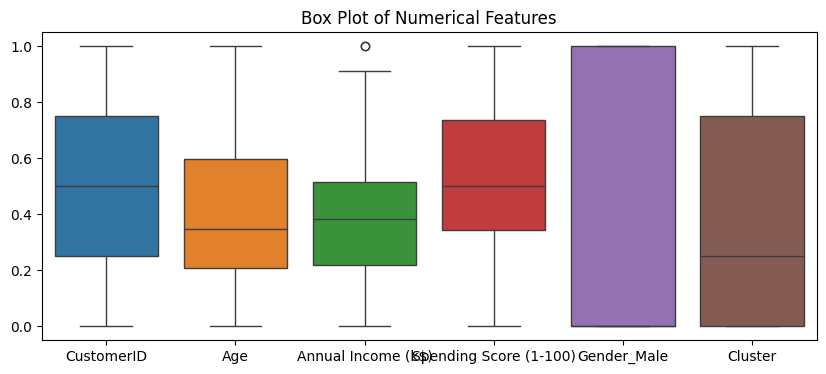

In [91]:
# Box plot for outlier detection
plt.figure(figsize=(10, 4))
sns.boxplot(data=mall[numerical_features])
plt.title('Box Plot of Numerical Features')
plt.show()


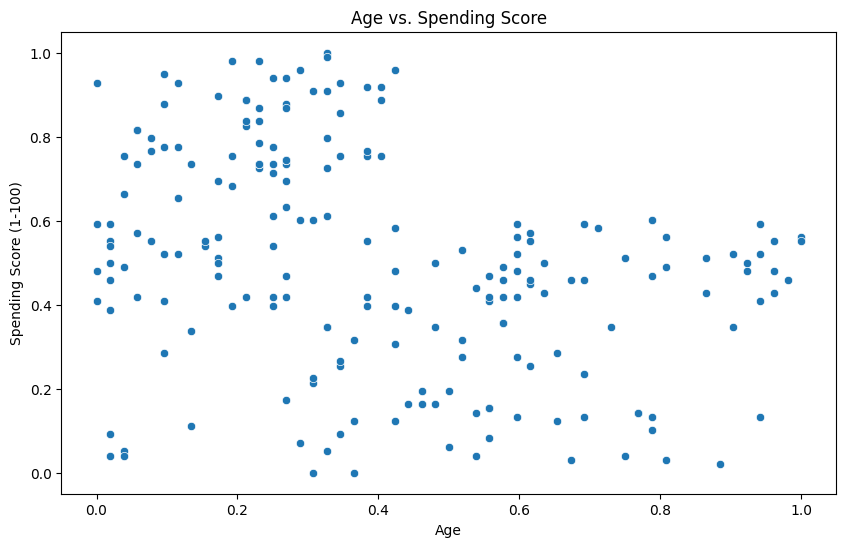

In [92]:
# Scatter plot to visualize relationships (example: Age vs. Spending Score)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=mall)
plt.title('Age vs. Spending Score')
plt.show()

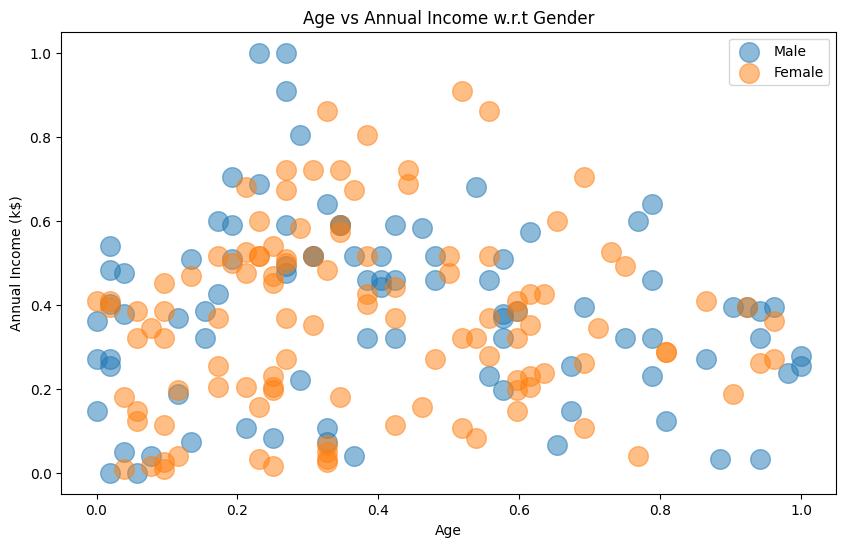

In [25]:
plt.figure(1 , figsize = (10 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = mall[mall['Gender'] == gender], s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

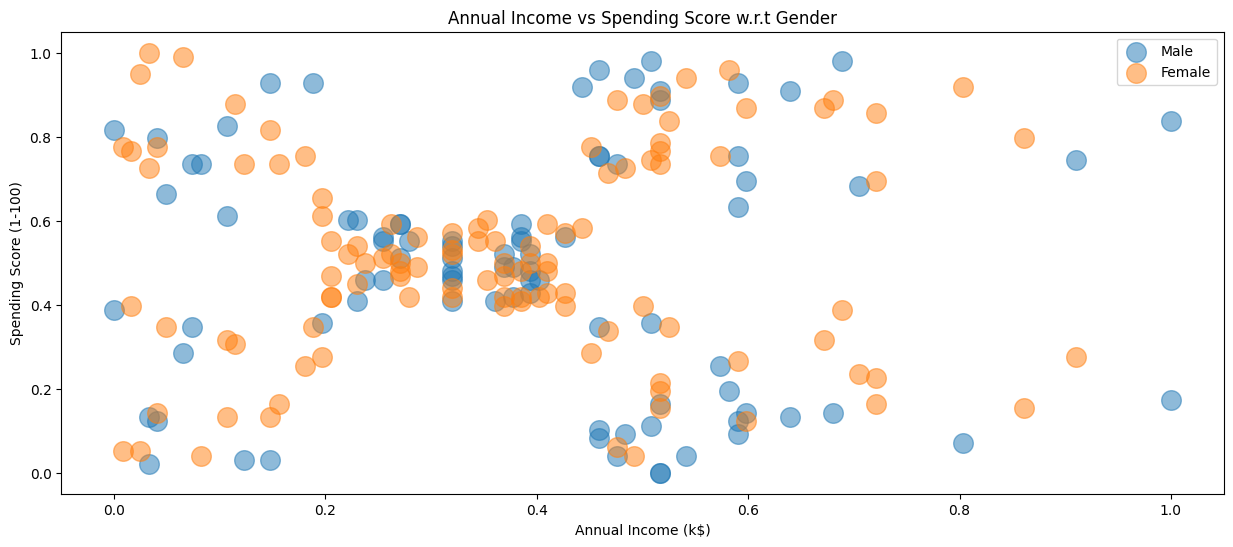

In [26]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = mall[mall['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()


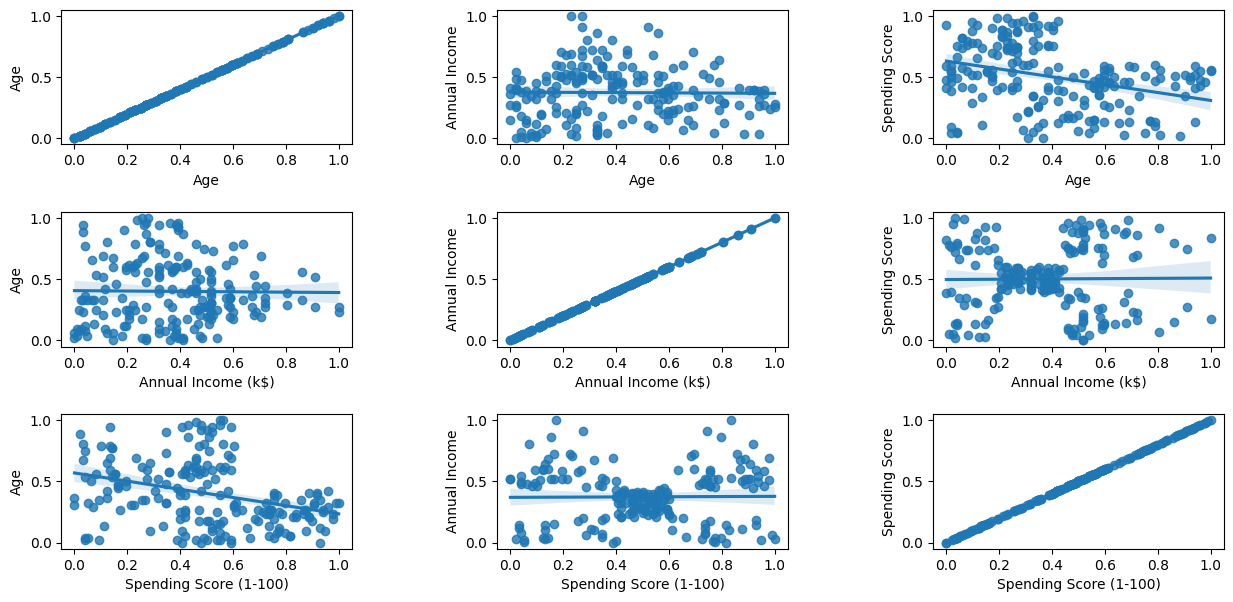

In [27]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = mall)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

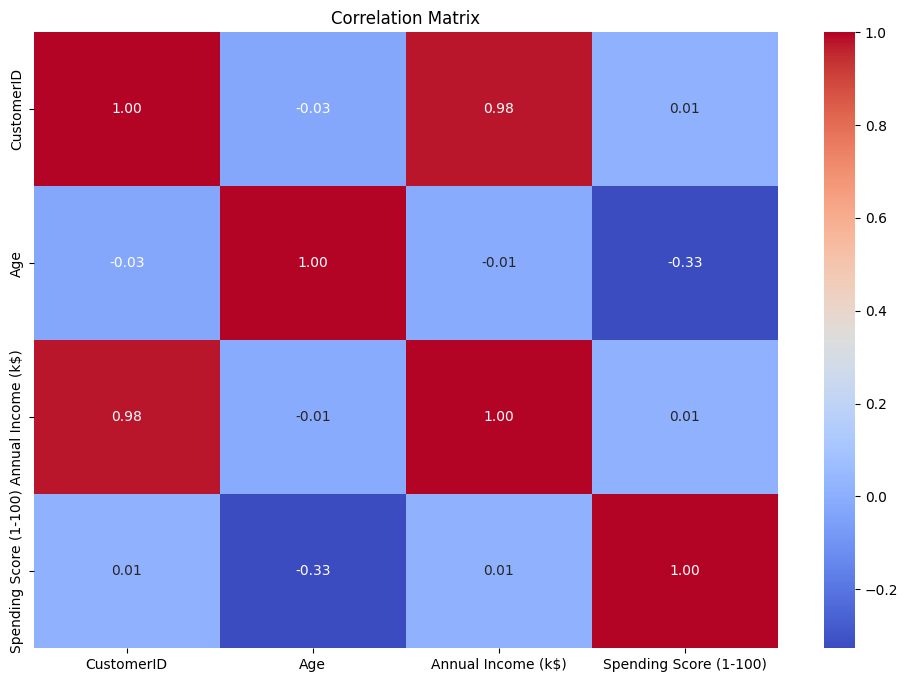

In [28]:
correlation_matrix = mall.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [29]:
#from sklearn.preprocessing import LabelEncoder

#df_encoded = mall.copy()
#le = LabelEncoder()
#df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])  # 'Male'->1, 'Female'->0

#correlation_matrix = df_encoded.corr()
#plt.figure(figsize=(10, 6))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('Correlation Matrix (with Gender Encoded)')
#plt.show()


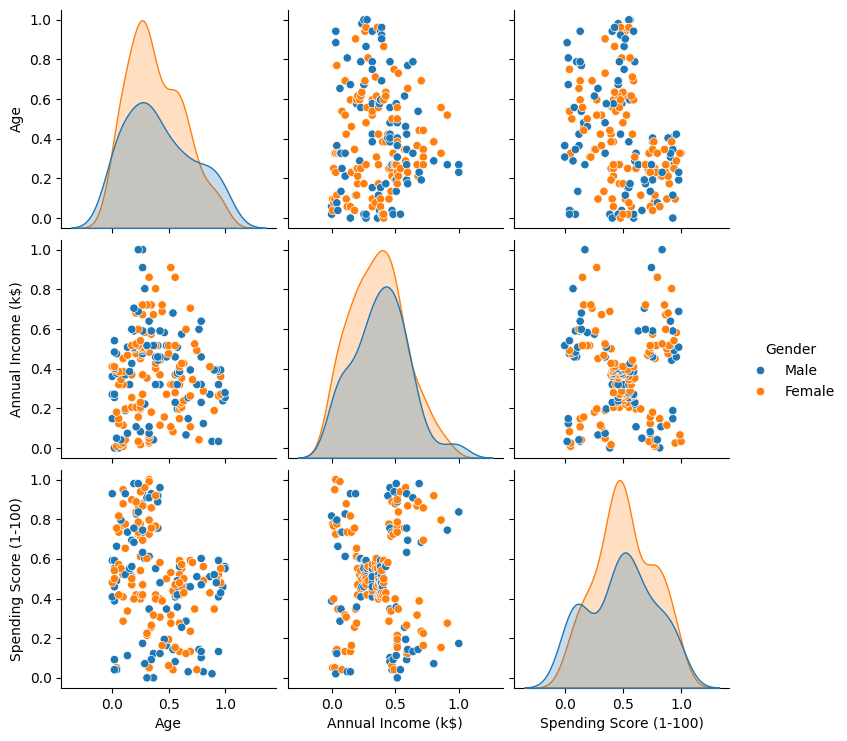

In [30]:
sns.pairplot(mall.drop(columns='CustomerID'), hue='Gender');

#PCA

In [31]:
# Select relevant features for PCA
features_pca = mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [32]:
# Standardizing the data
# Applying PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [93]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_pca)

In [94]:
# Applying PCA
pca = PCA(n_components=2)  # Choose number of components
features_pca = pca.fit_transform(features_scaled)

In [95]:
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=features_pca, columns=['Principal Component 1', 'Principal Component 2'])

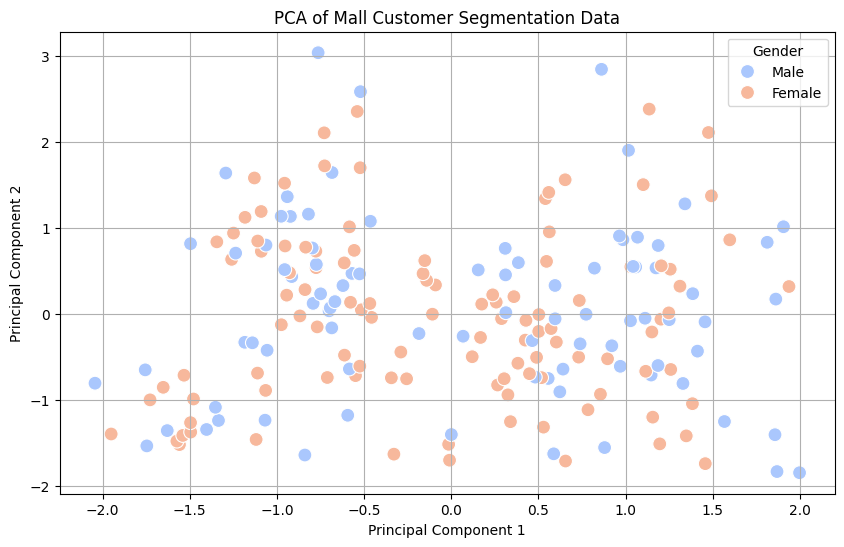

In [96]:
# Visualizing the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df, hue=mall['Gender'], palette='coolwarm', s=100)
plt.title('PCA of Mall Customer Segmentation Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender')
plt.grid()
plt.show()

In [97]:
mall['Gender_Male'] = mall['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
# Or use pandas get_dummies for robustness
# mall = pd.get_dummies(mall, columns=['Gender'], drop_first=True) # drops 'Female' column, keeps 'Male'

In [98]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Total explained variance: {sum(explained_variance) * 100:.2f}%')

Explained variance by each component: [0.5 0.5]
Total explained variance: 100.00%


In [99]:
#importing libraries for k means
#!pip install matplotlib-venn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [100]:
# Remove duplicates
mall.drop_duplicates(inplace=True)

In [101]:
# --- Feature Scaling for K-Means ---
# It's crucial to scale features for K-Means as it's distance-based.
# We will use StandardScaler for this part, as it's generally robust for clustering.
# Select features for clustering: Annual Income and Spending Score are key.

X = mall[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler_kmeans = StandardScaler()
X_scaled = scaler_kmeans.fit_transform(X)

In [102]:
#print("Scaled features for K-Means:")
#print(X_scaled.head())

**1. Determining Optimal Number of Clusters (K) - Elbow Method**

In [103]:
 # Calculate WCSS for different numbers of clusters
wcss = []
# Test k from 1 to 10 (or more, depending on data size)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # n_init to suppress warning
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

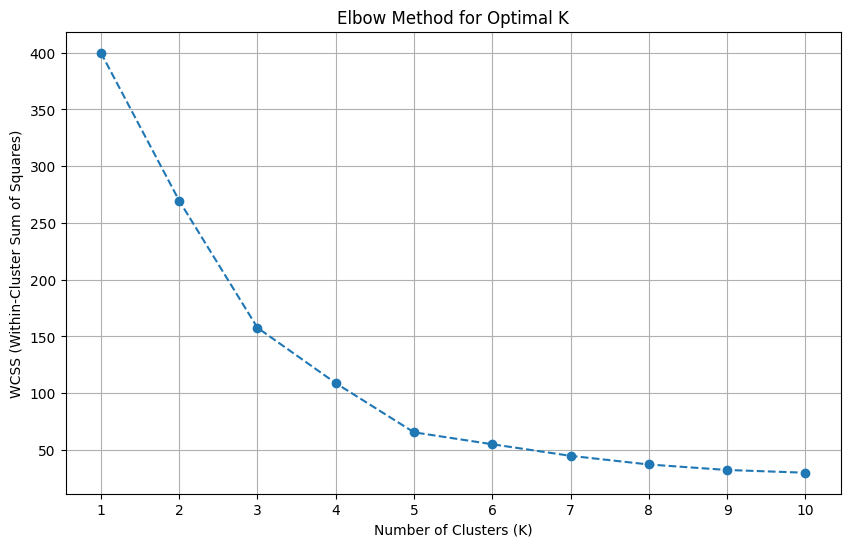

In [104]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

 Conclusion for Elbow Method:
 Look for the "elbow" point where the rate of decrease in WCSS significantly slows down.
 This point often indicates the optimal number of clusters.
For the Mall Customer dataset, K=5 is typically observed as the elbow point.

**2. Determining Optimal Number of Clusters (K) - Silhouette Score**

In [105]:
# Calculate Silhouette Score for different numbers of clusters (k > 1)
silhouette_scores = []
for i in range(2, 11): # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

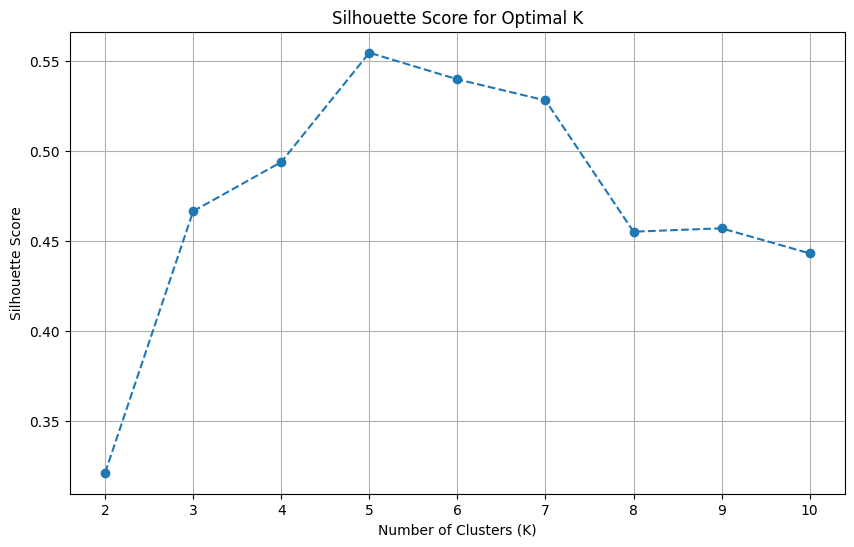

In [106]:
# Plot the Silhouette Score graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

**3. Applying K-Means with Optimal K (e.g., K=5)**

In [107]:
# Based on Elbow and Silhouette (typically K=5 for this dataset)
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)
# Add the cluster labels to the original mall DataFrame
mall['Cluster'] = clusters

In [108]:
print(f"\nK-Means Clustering with K={optimal_k} applied.")
print("First 5 rows with cluster labels:")
print(mall.head())


K-Means Clustering with K=5 applied.
First 5 rows with cluster labels:
   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
0    0.000000    Male  0.019231            0.000000                0.387755   
1    0.005025    Male  0.057692            0.000000                0.816327   
2    0.010050  Female  0.038462            0.008197                0.051020   
3    0.015075  Female  0.096154            0.008197                0.775510   
4    0.020101  Female  0.250000            0.016393                0.397959   

   Gender_Male  Cluster  
0            1        4  
1            1        2  
2            0        4  
3            0        2  
4            0        4  


**4. Visualizing the Clusters**

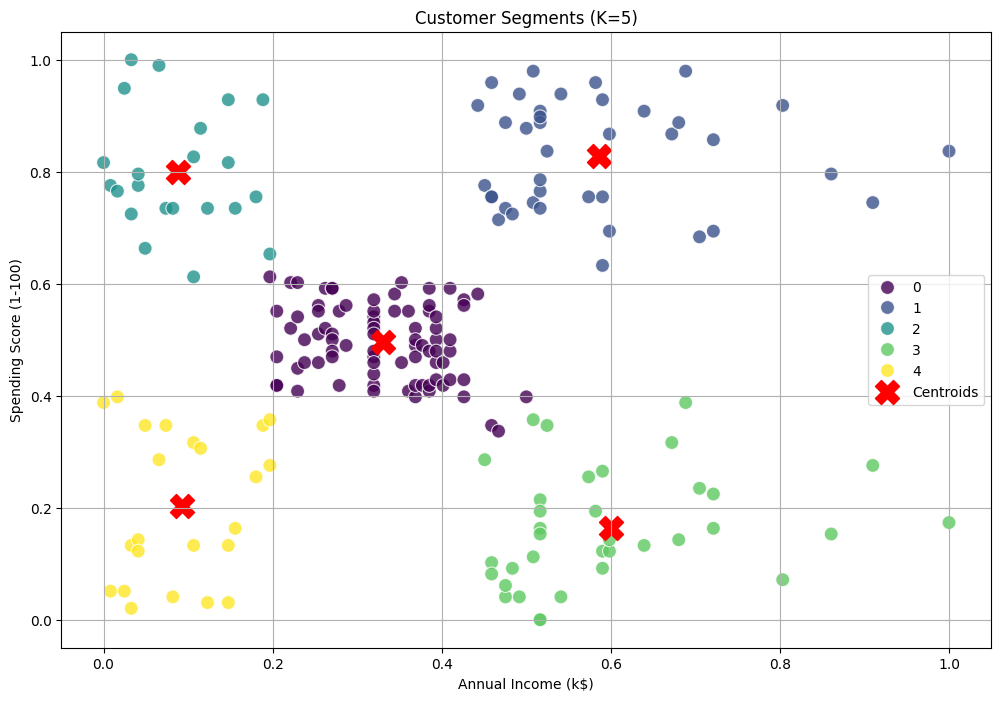

In [109]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=mall,
                palette='viridis', s=100, alpha=0.8, legend='full')
plt.scatter(scaler_kmeans.inverse_transform(kmeans_final.cluster_centers_)[:, 0],
            scaler_kmeans.inverse_transform(kmeans_final.cluster_centers_)[:, 1],
            s=300, c='red', marker='X', label='Centroids') # Plot centroids
plt.title(f'Customer Segments (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

**5. Analyzing Cluster Characteristics**

 Cluster 0: Average Income, Average Spending<br>
 Cluster 1: High Income, High Spending (Target Customers!)<br>
 Cluster 2: Low Income, Low Spending<br>
 Cluster 3: High Income, Low Spending<br>
Cluster 4: Low Income, High Spending<br>


In [110]:
# For gender, it's better to get counts or proportions
gender_distribution = mall.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack(fill_value=0)
print("\nGender Distribution within Clusters (Proportion):")
print(gender_distribution)


Gender Distribution within Clusters (Proportion):
Gender     Female      Male
Cluster                    
0        0.592593  0.407407
1        0.538462  0.461538
2        0.590909  0.409091
3        0.457143  0.542857
4        0.608696  0.391304


In [111]:
cluster_summary = mall.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Summary (Mean values):")
print(cluster_summary)


Cluster Summary (Mean values):
              Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                      
0        0.475309            0.330298                0.495087
1        0.282544            0.586381                0.827839
2        0.139860            0.087928                0.799629
3        0.444505            0.600000                0.164431
4        0.523411            0.092659                0.203194


In [112]:
#### **6. Final Conclusions and Recommendations**
#*   **Identified Segments:** Based on the cluster analysis, you can define specific customer segments. For instance:
 #   *   **"Target Customers" (High Income, High Spending):** These are your most valuable customers. Marketing efforts should focus on retention, loyalty programs, and exclusive offers.
  #  *   **"Careful Spenders" (High Income, Low Spending):** These customers have purchasing power but are not spending much at your mall. Strategies could include personalized recommendations, highlighting value, or introducing new product categories.
   # *   **"Budget Shoppers" (Low Income, Low Spending):** Focus on value-for-money products, discounts, and essential items.
    #*   **"Impulse Buyers" (Low Income, High Spending):** These customers might be easily influenced by promotions and trends. Focus on attractive deals and trending products.
    #*   **"Average Customers" (Average Income, Average Spending):** Maintain engagement with regular promotions and a diverse product range.

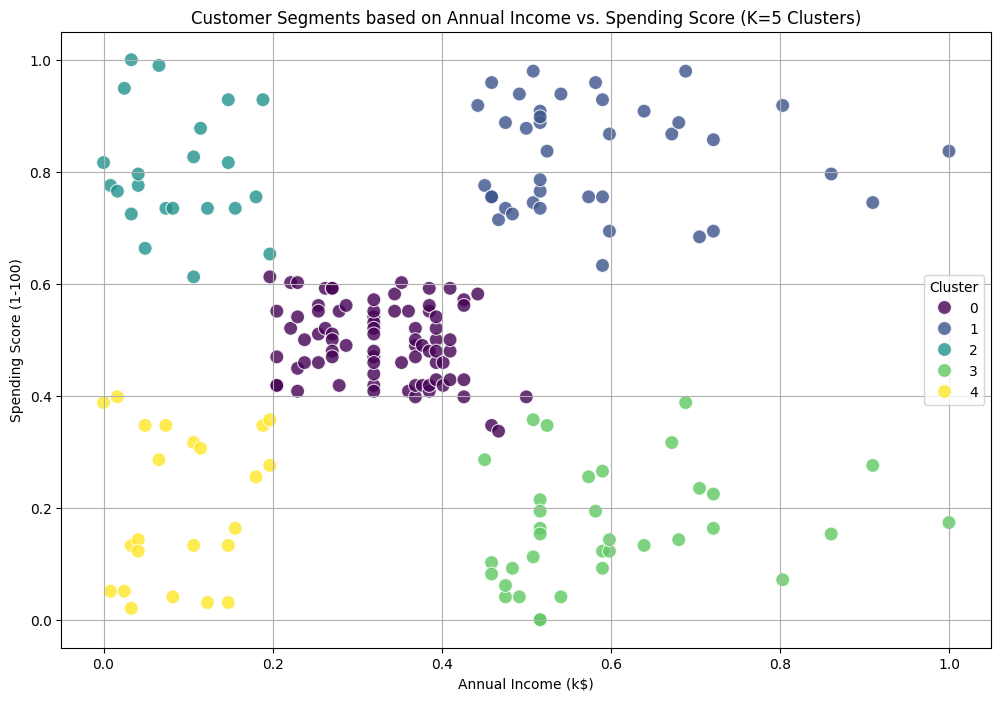

In [113]:
# --- 8. Visualization of Clusters ---
# Visualize the clusters based on Annual Income and Spending Score, which are key for segmentation.
# The 'Cluster' column will be used for coloring.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=mall,
                palette='viridis', s=100, alpha=0.8, legend='full')
plt.title(f'Customer Segments based on Annual Income vs. Spending Score (K={optimal_k} Clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

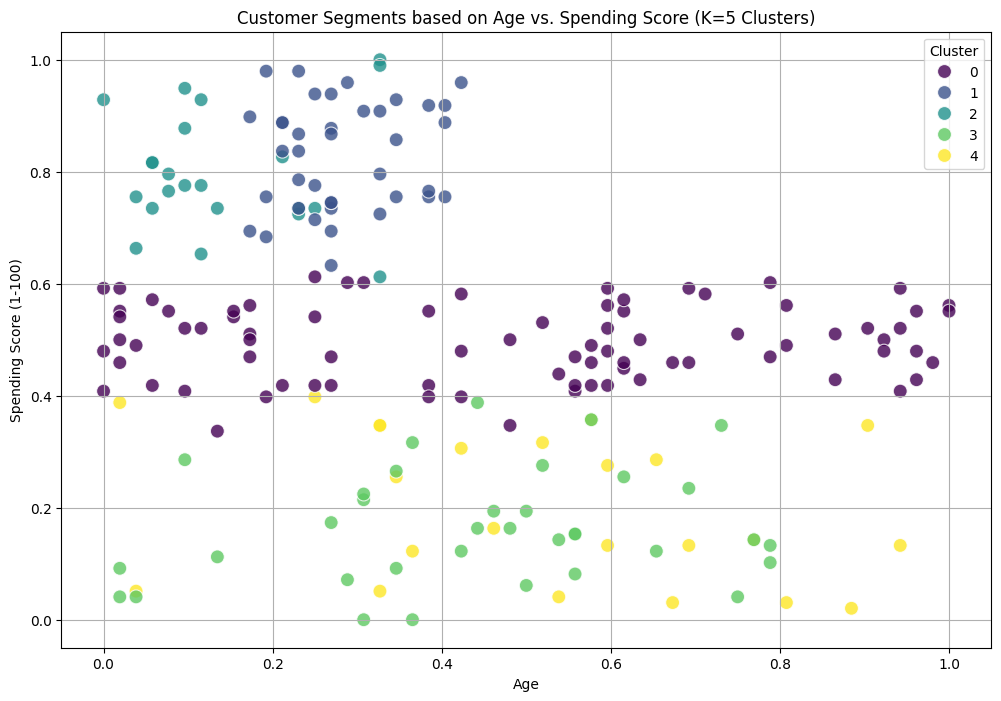

In [114]:
# You can also visualize other pairs of features if desired.
# For example: Age vs. Spending Score
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=mall,
                palette='viridis', s=100, alpha=0.8, legend='full')
plt.title(f'Customer Segments based on Age vs. Spending Score (K={optimal_k} Clusters)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

In [115]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Assuming you're using KMeans

In [116]:
X_dummy = pd.DataFrame({'CustomerID': range(1, 6),'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'] ,'Age': [25, 40, 60, 30, 55],'Annual Income (k$)': [15, 80, 120, 45, 70],'Spending Score (1-100)': [80, 10, 90, 50, 20]})


In [117]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X_train = X_dummy[features]

In [118]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train) # Fit the scaler on the correct features
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) # Assuming 5 clusters
kmeans.fit(X_scaled_train) # Fit the KMeans model on the scaled training data

KMeans(n_clusters=5, n_init=10, random_state=42)

In [119]:
X_scaled= pd.DataFrame(X_scaled_train, columns=features)
print("\nFeatures after Standardization:")
print(X_scaled.head())


Features after Standardization:
   Annual Income (k$)  Spending Score (1-100)
0           -1.451819                0.948683
1            0.398539               -1.264911
2            1.537221                1.264911
3           -0.597808                0.000000
4            0.113868               -0.948683


In [120]:
 # After training kmeans:
model_filename = 'kmeans_model.pkl'
scaler_filename = 'standard_scaler.pkl'
joblib.dump(kmeans, 'model_filename')
joblib.dump(scaler, 'scaler_filename') # Save the scaler too!


['scaler_filename']

In [121]:
model_filename = 'kmeans_model.pkl' # Or 'kmeans_customer_segmentation_model.pkl' as in your later example
scaler_filename = 'standard_scaler.pkl'

    # Corrected dump calls:
joblib.dump(kmeans, model_filename)
joblib.dump(scaler_kmeans, scaler_filename) # Make sure to save the scaler used for K-Means (scaler_kmeans)


['standard_scaler.pkl']

In [122]:
print(f"\n--- Model and Scaler Saved ---")
print(f"K-Means Model saved as: {model_filename}")
print(f"StandardScaler saved as: {scaler_filename}")


--- Model and Scaler Saved ---
K-Means Model saved as: kmeans_model.pkl
StandardScaler saved as: standard_scaler.pkl


In [123]:
  # --- 4. Immediate Verification After Saving ---
print("\n--- Verifying Saved Files ---")
if os.path.exists(model_filename):
        print(f"'{model_filename}' exists. Size: {os.path.getsize(model_filename)} bytes")

if os.path.exists(scaler_filename):
        print(f"'{scaler_filename}' exists. Size: {os.path.getsize(scaler_filename)} bytes")



--- Verifying Saved Files ---
'kmeans_model.pkl' exists. Size: 827 bytes
'standard_scaler.pkl' exists. Size: 967 bytes


In [124]:

# ... (your code to create and fit scaler) ...

print(f"Type of scaler object: {type(scaler)}")
print(f"Scaler attributes after fit: mean_={hasattr(scaler, 'mean_')}, scale_={hasattr(scaler, 'scale_')}")

# If you're using StandardScaler, these attributes should exist after fit()
if hasattr(scaler, 'mean_'):
    print(f"Scaler mean_: {scaler.mean_}")
if hasattr(scaler, 'scale_'):
    print(f"Scaler scale_: {scaler.scale_}")

joblib.dump(scaler, scaler_filename)
# ...


Type of scaler object: <class 'sklearn.preprocessing._data.StandardScaler'>
Scaler attributes after fit: mean_=True, scale_=True
Scaler mean_: [66. 50.]
Scaler scale_: [35.12833614 31.6227766 ]


['standard_scaler.pkl']

In [125]:
# Load the saved model and scaler
loaded_kmeans_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)

In [126]:
import os
print(os.path.exists('standard_scaler.pkl'))
print(os.path.getsize('standard_scaler.pkl'))


True
967
